## Task 1

### Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

#### An example plot

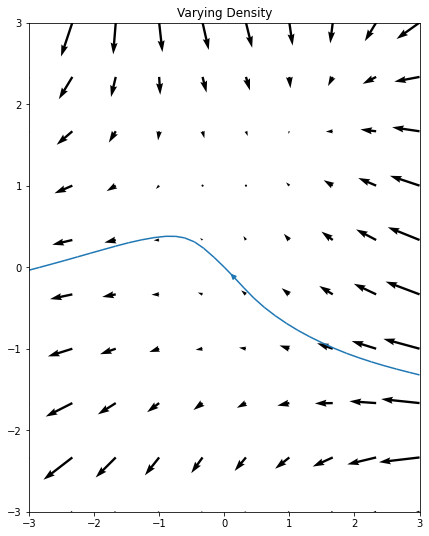

In [2]:
w = 3
Y, X = np.mgrid[-w:w:10j, -w:w:10j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
#gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot()
ax0.streamplot(X, Y, U, V, start_points=[(0,0)])
ax0.quiver(X, Y, U, V)

ax0.set_title('Varying Density')


#plt.tight_layout()
plt.show()

### Velocity as a linear system:

Make grid

In [3]:
w = 1
Y, X = np.mgrid[-w:w:20j, -w:w:20j]

Get A and the linear system

In [4]:
a = .1
A = np.array([[a, a],
              [-.25, 0]])

U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y

#### Compute eigenvalue

In [5]:
np.linalg.eig(A)

(array([0.05+0.15j, 0.05-0.15j]),
 array([[-0.16903085-0.50709255j, -0.16903085+0.50709255j],
        [ 0.84515425+0.j        ,  0.84515425-0.j        ]]))

#### Euler

In [6]:
def euler(x0, vx, maxstep=100, stepsize=0.01, backward=-1):
    # vx the velocity function of x, as a numpy.array
    # x0 initial point, as a numpy.array
    # return trajactory
    x = None
    nx = x0
    traj = [nx]
    
    for i in range(maxstep):
        x = nx
        v = vx(x)
        nx = x - backward*stepsize*v
        traj.append(nx)
        
    return np.array(traj)

In [7]:
def vx_task1(x, a=.1):
    a = .1
    A = np.array([[a, a],
              [-.25, 0]])

    u = A[0][0]*x[0] + A[0][1]*x[1]
    v = A[1][0]*x[0] + A[1][1]*x[1]
    
    return np.array([u,v])

In [8]:
def vx_task3(x, a=1):
    u = a*x[0]-x[1]-x[0]*(x[0]**2+x[1]**2)
    v = x[0]+a*x[1]-x[1]*(x[0]**2+x[1]**2)
    return np.array([u,v])

In [9]:
traj = euler(np.array([1,-1]), vx_task1, maxstep=10000, backward=1)
trajx = traj[:, 0]
trajy = traj[:, 1]

Plot the vector field and one representative trajectory

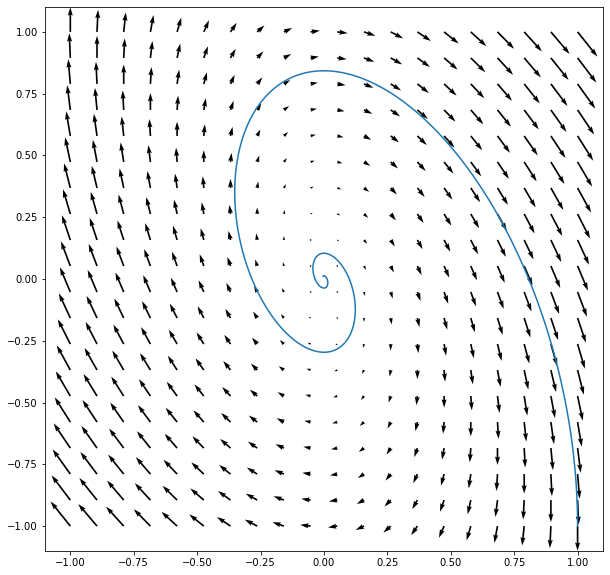

In [10]:
fig1 = plt.figure(figsize=(10, 10))

fig1a = fig1.add_subplot()

fig1a.quiver(X, Y, U, V)
#fig1a.streamplot(X, Y, U, V, integration_direction="backward")

fig1a.plot(trajx, trajy) # plot the trajactory from Euler method

plt.show()

#### Reproduce the figure2 in exercise sheet:

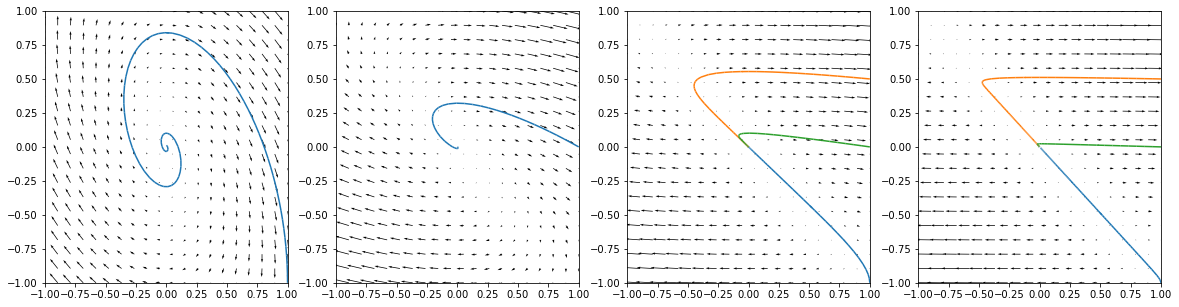

In [11]:
w = 1
Y, X = np.mgrid[-w:w:20j, -w:w:20j]

fig1 = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4)

a = .1
A = np.array([[a, a],
              [-.25, 0]])
U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y
fig1a = fig1.add_subplot(gs[0,0])
fig1a.quiver(X, Y, U, V)
fig1a.streamplot(X, Y, U, V, start_points=[(1,-1)], integration_direction="backward", arrowstyle="-")


a = .5
A = np.array([[a, a],
              [-.25, 0]])
U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y
fig1b = fig1.add_subplot(gs[0,1])
fig1b.quiver(X, Y, U, V)
fig1b.streamplot(X, Y, U, V, start_points=[(1,0)], integration_direction="backward", arrowstyle="-")

a = 2
A = np.array([[a, a],
              [-.25, 0]])
U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y
fig1c = fig1.add_subplot(gs[0,2])
fig1c.quiver(X, Y, U, V)
fig1c.streamplot(X, Y, U, V, start_points=[(1,-1)], integration_direction="backward", arrowstyle="-")
fig1c.streamplot(X, Y, U, V, start_points=[(1,0.5)], integration_direction="backward", arrowstyle="-")
fig1c.streamplot(X, Y, U, V, start_points=[(1,0)], integration_direction="backward", arrowstyle="-")




a = 10
A = np.array([[a, a],
              [-.25, 0]])
U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y
fig1d = fig1.add_subplot(gs[0,3])
fig1d.quiver(X, Y, U, V)
fig1d.streamplot(X, Y, U, V, start_points=[(1,-1)], integration_direction="backward", arrowstyle="-")
fig1d.streamplot(X, Y, U, V, start_points=[(1,0.5)], integration_direction="backward", arrowstyle="-")
fig1d.streamplot(X, Y, U, V, start_points=[(1,0)], integration_direction="backward", arrowstyle="-")


plt.show()

#### Task 2 Bifurcation

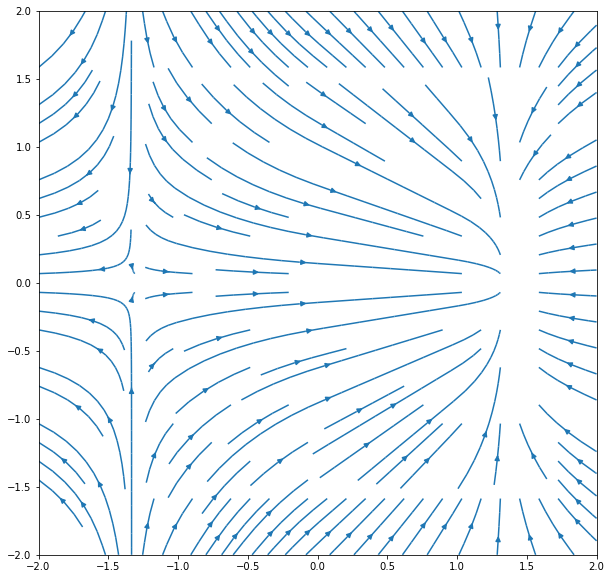

In [12]:
w = 2
Y, X = np.mgrid[-w:w:5j, -w:w:5j]

a = 2
U = a - X**2
V = -Y

fig2 = plt.figure(figsize=(10, 10))

fig2a = fig2.add_subplot()

#fig1a.quiver(X, Y, U, V)
fig2a.streamplot(X, Y, U, V, integration_direction="backward")

plt.show()


#### Bifurcation diagram at al

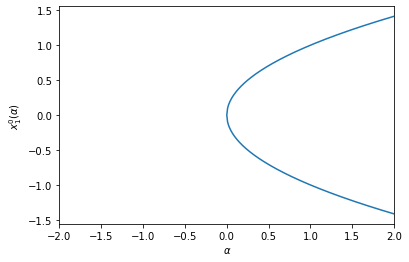

In [13]:
x = abs(np.arange(2, -0.01, -0.01))
y = np.power(x, 0.5)

x = np.append(x, x[::-1])
y = np.append(y, -y[::-1])

plt.plot(x, y)
plt.xlim((-2,2))
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_1^0(\alpha)$")
plt.show()

### Task 4

In [14]:
def chaotic_exp(r, x0=0.5, maxstep=100):
    xn = x0
    for i in range(maxstep):
        xn = r*xn*(1-xn)
        yield xn

def task4_plot(r):
    t=np.arange(100)
    xn=[]
    for x in chaotic_exp(1):
        xn.append(x)

    plt.xlabel("N")
    plt.ylabel("$X_n$")
    plt.plot(t, xn)
    plt.show()

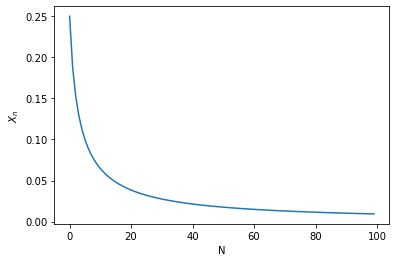

In [15]:
task4_plot(2)

bifurcation diagram

100%|████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:00<00:00, 3536.19it/s]


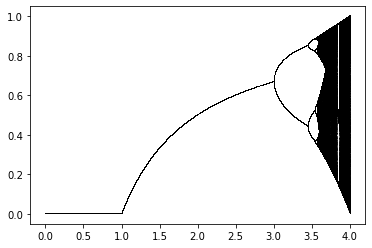

In [18]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
def LogisticMap():
    r = np.arange(0, 4, 0.0001)
    x = 0.2 
    iters = 1000
    last = 100
    for i in tqdm(range(iters+last)):
        x = r * x * (1 - x)
        if i >= iters:
            plt.plot(r, x, ',k', alpha=0.25)
    plt.show()
LogisticMap()

Lorenz attractor σ = 10,β = 8/3, and ρ = 28.

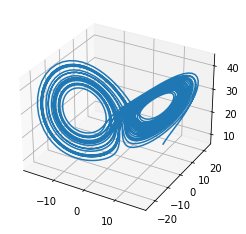

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0 
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [10.0, 10.0, 10.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

Test this by plotting another trajectory

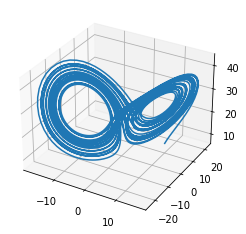

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0 
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [10.0+10**(-8), 10.0, 10.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

change the parameter ρ to the value 0.5

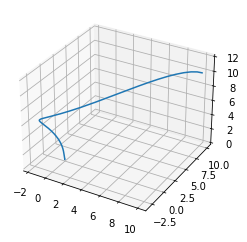

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 0.5 
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [10.0, 10.0, 10.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

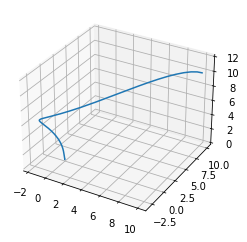

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 0.5 
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [10.0+10**(-8), 10.0, 10.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()